In [1]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,BatchNormalization
from keras import backend as K
# from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import RMSprop,SGD
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 
# tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
dataset = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
dataset.head() 



,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label

X = dataset.drop('label',axis = 1)
y = dataset['label']

In [4]:
print(X.shape)

print(y.shape)

(372450, 784)
(372450,)


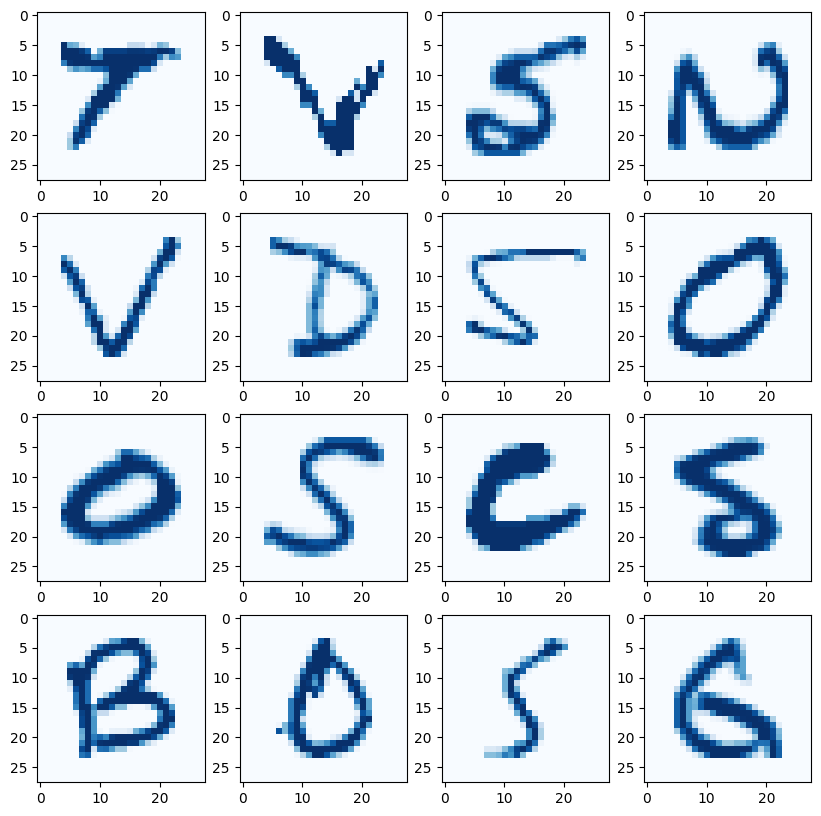

In [5]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (10,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Blues')
plt.show()

In [6]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

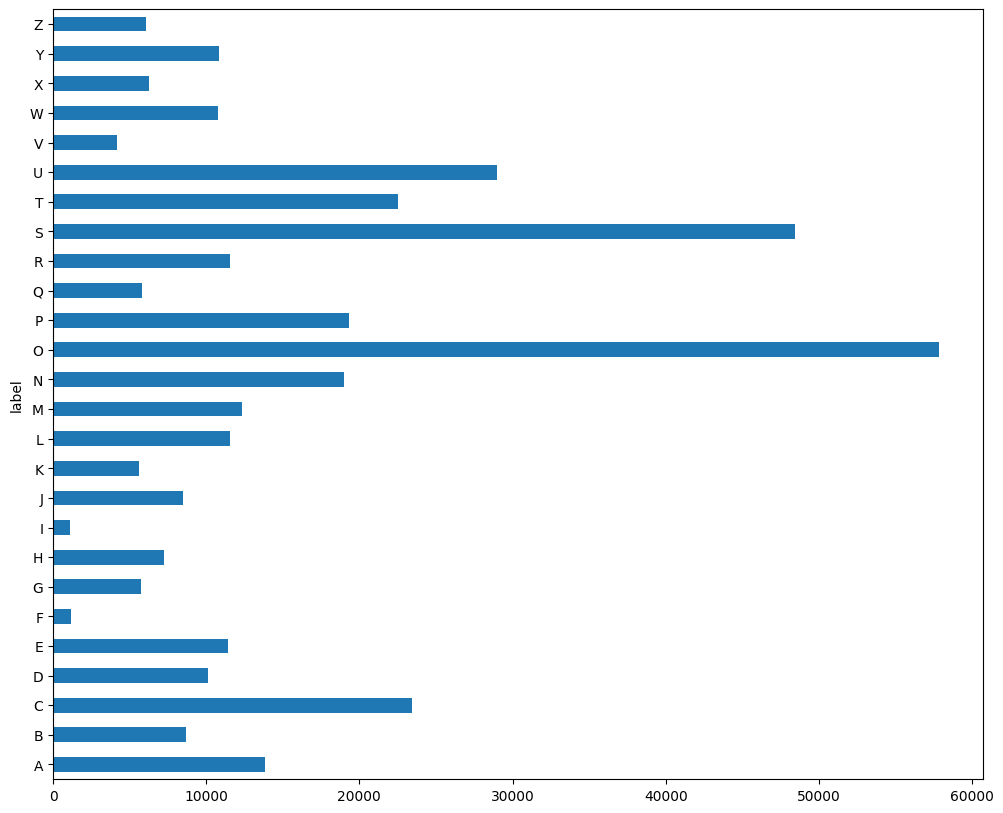

In [7]:
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(12,10))
plt.show()

# Data Preparation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
X_train.shape

(279337, 784)

In [10]:
standard_scaler = MinMaxScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


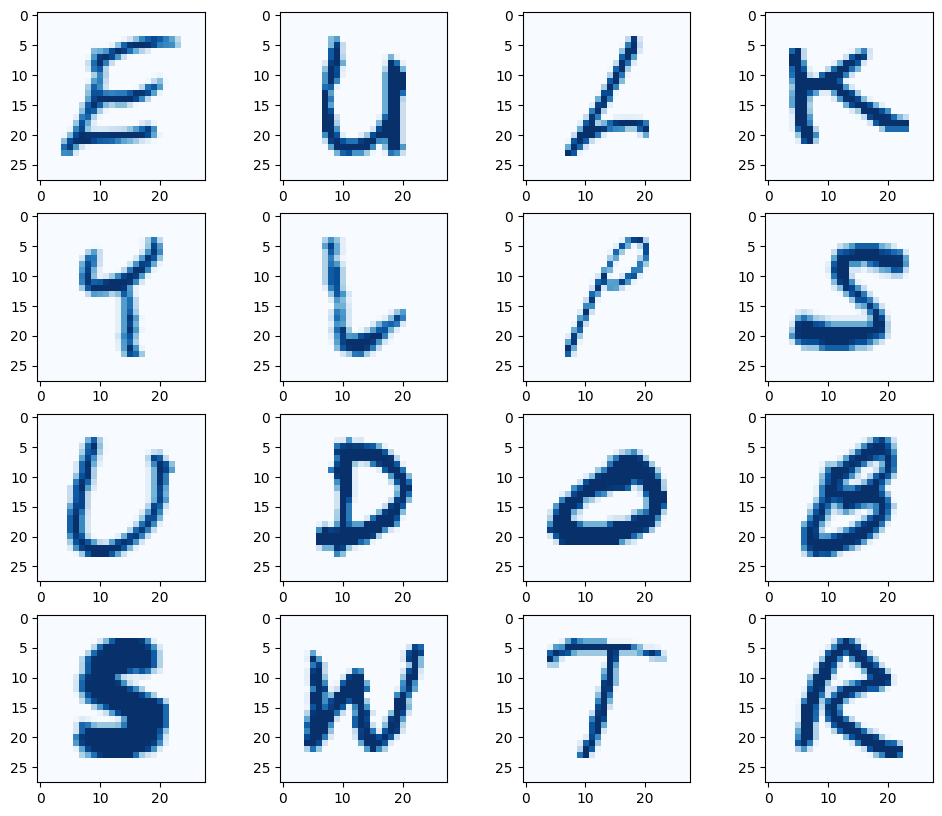

In [11]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Blues')
plt.show()

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [13]:
X_train.shape

(279337, 28, 28, 1)

In [14]:
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [15]:
y_train.shape

(279337, 26)

# Model

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(26, activation='softmax'))

In [17]:
from keras.callbacks import ModelCheckpoint

best_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_loss_model.weights.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_val_loss_model.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [18]:
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         102,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           2,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,870 (628.40 KB)

 Trainable params: 160,870 (628.40 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=200, verbose=2,callbacks=[best_loss_checkpoint, best_val_loss_checkpoint])

Epoch 1/8
1397/1397 - 169s - 121ms/step - accuracy: 0.9403 - loss: 0.2131 - val_accuracy: 0.9760 - val_loss: 0.0869
Epoch 2/8
1397/1397 - 149s - 107ms/step - accuracy: 0.9800 - loss: 0.0710 - val_accuracy: 0.9813 - val_loss: 0.0691
Epoch 3/8
1397/1397 - 155s - 111ms/step - accuracy: 0.9849 - loss: 0.0545 - val_accuracy: 0.9849 - val_loss: 0.0556
Epoch 4/8
1397/1397 - 156s - 112ms/step - accuracy: 0.9875 - loss: 0.0444 - val_accuracy: 0.9858 - val_loss: 0.0527
Epoch 5/8
1397/1397 - 158s - 113ms/step - accuracy: 0.9896 - loss: 0.0375 - val_accuracy: 0.9868 - val_loss: 0.0505
Epoch 6/8
1397/1397 - 149s - 107ms/step - accuracy: 0.9906 - loss: 0.0327 - val_accuracy: 0.9889 - val_loss: 0.0421
Epoch 7/8
1397/1397 - 201s - 144ms/step - accuracy: 0.9921 - loss: 0.0285 - val_accuracy: 0.9877 - val_loss: 0.0431
Epoch 8/8
1397/1397 - 210s - 150ms/step - accuracy: 0.9928 - loss: 0.0251 - val_accuracy: 0.9889 - val_loss: 0.0395


In [20]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

CNN Score: 0.9889381527900696


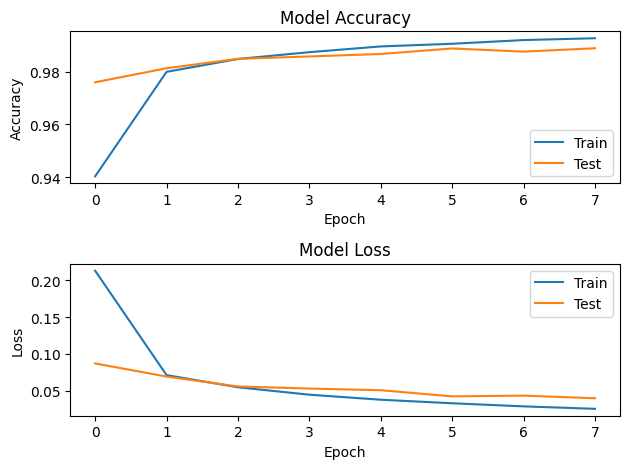

In [21]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()


In [22]:
model.load_weights("../models/best_val_loss_model.weights.h5")

2910/2910 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step


Text(0.5, 1.0, 'Confusion Matrix')

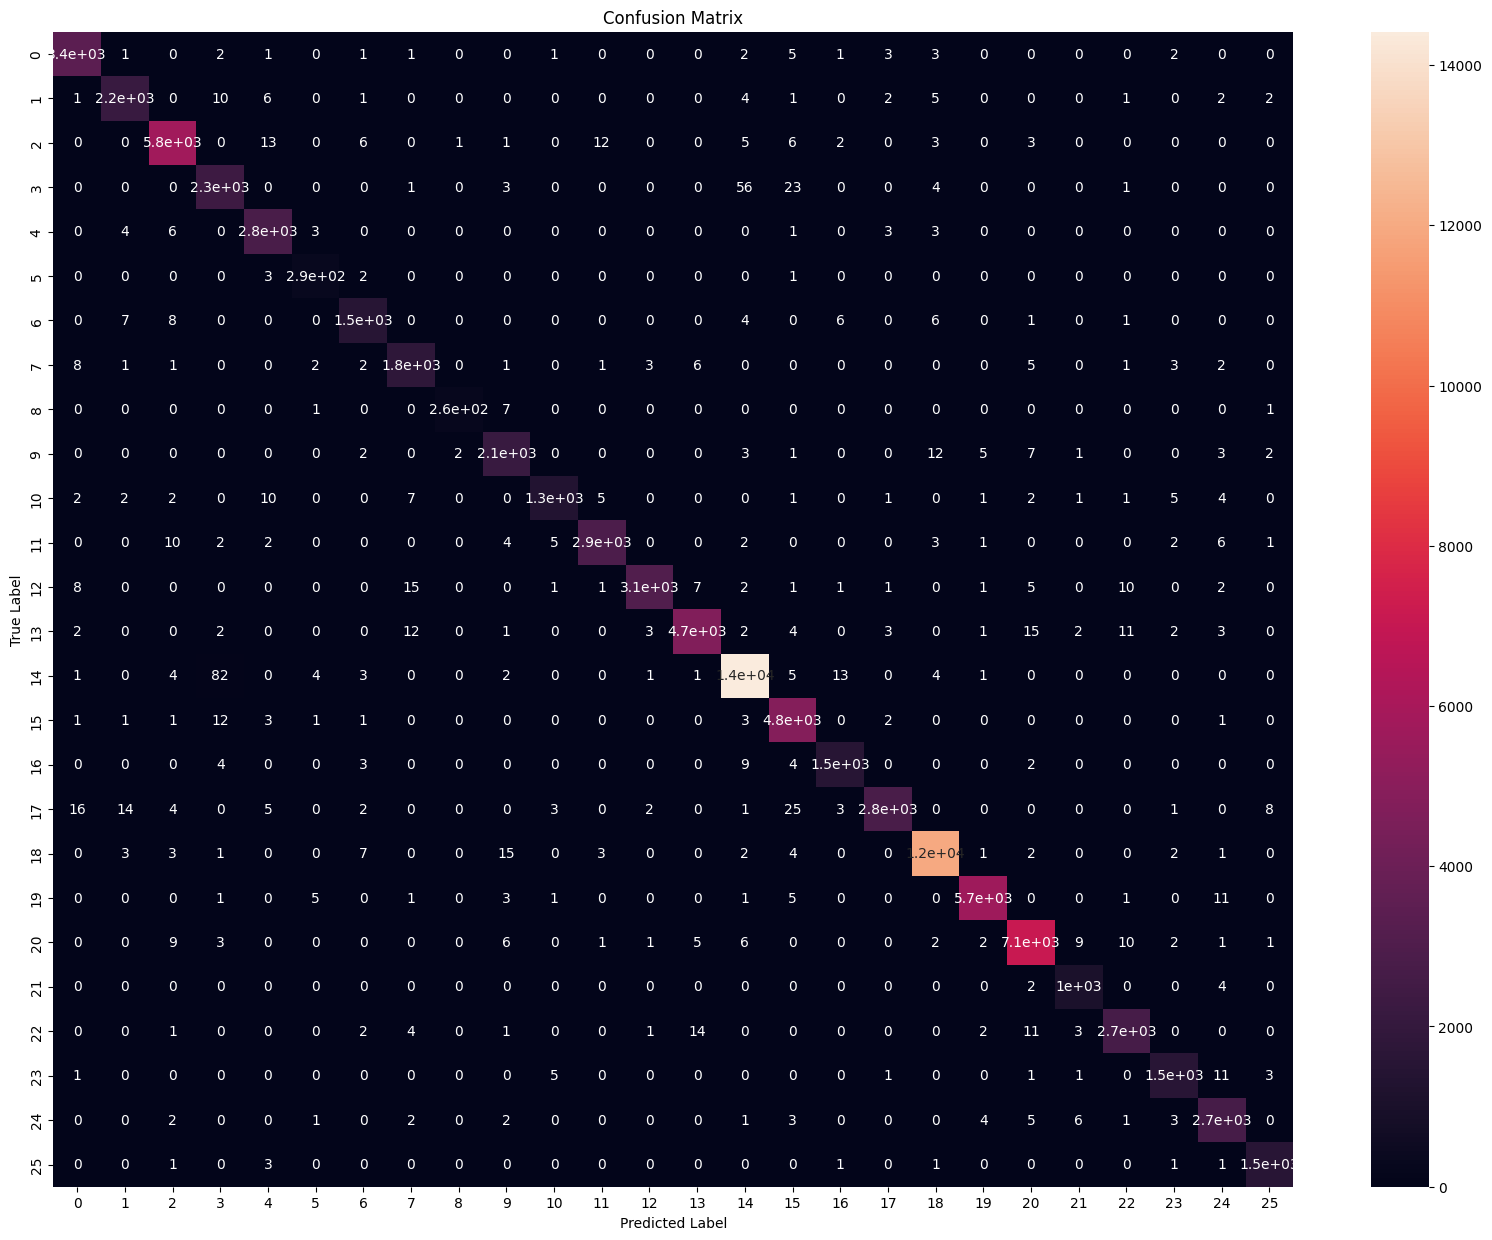

In [23]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.heatmap(df_cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# application


In [24]:
def clear_whiteboard(display):
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    display[wb_y1-10:wb_y2+12, wb_x1-10:wb_x2+12] = (255, 255, 255)

In [25]:
def setup_display():
    title = np.zeros((80, 950, 3), dtype=np.uint8)
    board = np.zeros((600, 650, 3), dtype=np.uint8)
    panel = np.zeros((600, 300, 3), dtype=np.uint8)
    board[5:590, 8:645] = (255, 255, 255)
    
    board = cv2.rectangle(board, (8, 5), (645, 590), (255, 0, 0), 3)
    panel = cv2.rectangle(panel, (1, 4), (290, 590), (0, 255, 192), 2)
    panel = cv2.rectangle(panel, (22, 340), (268, 560), (255, 255, 255), 1)
    panel = cv2.rectangle(panel, (22, 65), (268, 280), (255, 255, 255), 1)
    
    cv2.line(panel, (145, 340), (145, 560), (255, 255, 255), 1)
    cv2.line(panel, (22, 380), (268, 380), (255, 255, 255), 1)
    
    cv2.putText(title, "       " +  window_name,(10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 2)
    cv2.putText(panel, "Action: ", (23, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    cv2.putText(panel, "Best Predictions", (52, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)
    cv2.putText(panel, "Prediction", (42, 362), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(panel, "Accuracy", (168, 362), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(panel, actions[0], (95, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, action_colors[actions[0]], 1)

    display = np.concatenate((board, panel), axis=1)
    display = np.concatenate((title, display), axis=0)
    
    return display

In [26]:
def setup_panel(display):
    action_region_pt1, action_region_pt2 = status_regions["action"]
    preview_region_pt1, preview_region_pt2 = status_regions["preview"]
    label_region_pt1, label_region_pt2 = status_regions["labels"]
    acc_region_pt1, acc_region_pt2 = status_regions["accs"]
    
    display[action_region_pt1[1]:action_region_pt2[1], action_region_pt1[0]:action_region_pt2[0]] = (0, 0, 0)
    display[preview_region_pt1[1]:preview_region_pt2[1], preview_region_pt1[0]:preview_region_pt2[0]] = (0, 0, 0)
    display[label_region_pt1[1]:label_region_pt2[1], label_region_pt1[0]:label_region_pt2[0]] = (0, 0, 0)
    display[acc_region_pt1[1]:acc_region_pt2[1], acc_region_pt1[0]:acc_region_pt2[0]] = (0, 0, 0)
    
    if crop_preview is not None:
        display[preview_region_pt1[1]:preview_region_pt2[1], preview_region_pt1[0]:preview_region_pt2[0]] = cv2.resize(crop_preview, (crop_preview_h, crop_preview_w)) 
    
    if best_predictions:
        labels = list(best_predictions.keys())
        accs = list(best_predictions.values())
        prediction_status_cordinate = [
            ((725, 505), (830, 505), (0, 0, 255)),
            ((725, 562), (830, 562), (0, 255, 0)),
            ((725, 619), (830, 619), (255, 0, 0))
        ]
        for i in range(len(labels)):
            label_cordinate, acc_cordinate, color = prediction_status_cordinate[i]
            
            cv2.putText(display, labels[i], label_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.putText(display, str(accs[i]), acc_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        
        for i in range(len(labels), 3):
            label_cordinate, acc_cordinate, color = prediction_status_cordinate[i]
            
            cv2.putText(display, "_", label_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.putText(display, "_", acc_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    
    cv2.putText(display, current_action, (745, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.6, action_colors[current_action], 1)

In [27]:
def arrange_crop_rectangle_cordinates(cor1, cor2):
    if cor1 is None or cor2 is None:
        return
    
    result = ()
    if cor1[1] < cor2[1]:
        if cor1[0] > cor2[0]:
            result = ( (cor2[0], cor1[1]), (cor1[0], cor2[1]) )
        else:
            result = (cor1, cor2)
    else:
        if cor2[0] > cor1[0]:
            result = ( (cor1[0], cor2[1]), (cor2[0], cor1[1]) )
        else:
            result = (cor2, cor1)
    return result


In [28]:
def mouse_click_event(event, x, y, flags, params):
    if current_action is actions[1]:
        whiteboard_draw(event, x, y)
    elif current_action is actions[2]:
        character_crop(event, x, y)

In [29]:
def whiteboard_draw(event, x, y):
    global left_button_down, right_button_down
    
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    if event is cv2.EVENT_LBUTTONUP:
        left_button_down = False
    elif event is cv2.EVENT_RBUTTONUP:
        right_button_down = False
    elif wb_x1 <= x <= wb_x2 and wb_y1 <= y <= wb_y2:
        color = (0, 0, 0)
        if event in [cv2.EVENT_LBUTTONDOWN, cv2.EVENT_LBUTTONUP, cv2.EVENT_RBUTTONDOWN, cv2.EVENT_RBUTTONUP, cv2.EVENT_MOUSEMOVE]:
            if event is cv2.EVENT_LBUTTONDOWN:
                color = (0, 0, 0)
                left_button_down = True
            elif left_button_down and event is cv2.EVENT_MOUSEMOVE:
                color = (0, 0, 0)
            elif event is cv2.EVENT_RBUTTONDOWN:
                color = (255, 255, 255)
                right_button_down = True
            elif right_button_down and event is cv2.EVENT_MOUSEMOVE:
                color = (255, 255, 255)
            else:
                return

            cv2.circle(display, (x, y), 10, color, -1)
            cv2.imshow(window_name, display)

In [30]:
def character_crop(event, x, y):
    global bound_rect_cordinates, lbd_cordinate, lbu_cordinate, crop_preview, display, best_predictions
    
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    if wb_x1 <= x <= wb_x2 and wb_y1 <= y <= wb_y2:
        if event is cv2.EVENT_LBUTTONDOWN:
            lbd_cordinate = (x, y)
        elif event is cv2.EVENT_LBUTTONUP:
            lbu_cordinate = (x, y)

        if lbd_cordinate is not None and lbu_cordinate is not None:
            bound_rect_cordinates = arrange_crop_rectangle_cordinates(lbd_cordinate, lbu_cordinate)
        elif lbd_cordinate is not None:
            if event is cv2.EVENT_MOUSEMOVE:
                mouse_move_cordinate = (x, y)
                mouse_move_rect_cordinates = arrange_crop_rectangle_cordinates(lbd_cordinate, mouse_move_cordinate)
                top_cordinate, bottom_cordinate = mouse_move_rect_cordinates[0], mouse_move_rect_cordinates[1]
                
                display_copy = display.copy()
                cropped_region = display_copy[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]]
                filled_rect = np.zeros((cropped_region.shape[:]))
                filled_rect[:, :, :] = (0, 255, 0)
                filled_rect = filled_rect.astype(np.uint8)
                cropped_rect = cv2.addWeighted(cropped_region, 0.3, filled_rect, 0.5, 1.0)
                
                if cropped_rect is not None:
                    display_copy[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]] = cropped_rect
                    cv2.imwrite("captured/filled.jpg", display_copy)
                    cv2.imshow(window_name, display_copy)

        if bound_rect_cordinates is not None:
            top_cordinate, bottom_cordinate = bound_rect_cordinates[0], bound_rect_cordinates[1]
            crop_preview = display[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]].copy()
            crop_preview = np.invert(crop_preview)
            best_predictions = predict(model, crop_preview)
            display_copy = display.copy()
            bound_rect_cordinates = lbd_cordinate = lbu_cordinate = None
            setup_panel(display)
            cv2.imshow(window_name, display)
    elif event is cv2.EVENT_LBUTTONUP:
        lbd_cordinate = lbu_cordinate = None
        cv2.imshow(window_name, display)        

In [31]:
def load_model(path):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(26, activation='softmax'))
    model.load_weights(path)
    
    return model

In [32]:
def predict(model, image):
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = np.reshape(image, (1, image.shape[0], image.shape[1], 1))
    prediction = model.predict(image)
    best_predictions = dict()
    
    for i in range(3):
        max_i = np.argmax(prediction[0])
        acc = round(prediction[0][max_i], 1)
        if acc > 0:
            label = labels[max_i]
            best_predictions[label] = acc
            prediction[0][max_i] = 0
        else:
            break
            
    return best_predictions

In [33]:
left_button_down = False
right_button_down = False
bound_rect_cordinates = lbd_cordinate = lbu_cordinate = None
whiteboard_region = {"x": (20, 632), "y": (98, 656)}
window_name = "Live Cropped Character Recognition"
best_predictions = dict()
crop_preview_h, crop_preview_w = 238, 206
crop_preview = None
actions = ["N/A", "DRAW", "CROP"]
action_colors = {
    actions[0]: (0, 0, 255),
    actions[1]: (0, 255, 0),
    actions[2]: (0, 255, 192)
}
current_action = actions[0]
status_regions = {
    "action": ((736, 97), (828, 131)),
    "preview": ((676, 150), (914, 356)),
    "labels": ((678, 468), (790, 632)),
    "accs": ((801, 468), (913, 632))
}
model = load_model("../models/best_val_loss_model.weights.h5")

In [ ]:
display = setup_display()
cv2.imshow(window_name, display)
cv2.setMouseCallback(window_name, mouse_click_event)
pre_action = None

while True:
    k = cv2.waitKey(1)
    if k == ord('d') or k == ord('c'):
        if k == ord('d'):
            current_action = actions[1]
        elif k == ord('c'):
            current_action = actions[2]
        if pre_action is not current_action:
            setup_panel(display)
            cv2.imshow(window_name, display)
            pre_action = current_action
    elif k == ord('e'):
        clear_whiteboard(display)
        cv2.imshow(window_name, display)
    elif k == 27:
        break
        
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
